<a href="https://colab.research.google.com/github/Milantamang1/StockPredictionSystem/blob/main/StockPredictionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/StockPredicitionDatasets.csv")
df.head()

<ipython-input-2-665fcf51eeab>:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/StockPredicitionDatasets.csv")


Date    LTP   High    Low   Qty   Turnover  SMA_5  SMA_20        RSI  \
0  5/13/2010  548.0  548.0  508.0  2519  1378182.0  504.8   488.8  54.090909   
1  5/16/2010  525.0  555.0  510.0  3010  1590630.0  507.4   494.3  48.971193   
2  5/17/2010  548.0  550.0  507.0  3039  1623947.0  520.2   502.1  59.663866   
3  5/18/2010  571.0  571.0  540.0  2295  1271792.0  538.2   511.7  65.476190   
4  5/19/2010  580.0  594.0  570.0  3115  1811867.0  554.4   523.2  70.731707   

       MACD  Volatility  Volume_MA5  Volume_MA20  month  day_of_week  \
0 -5.480371    0.044453    459137.6     338371.0      4            3   
1 -3.143283    0.047071    742003.6     476387.5      4            6   
2  0.558347    0.047851    960211.0     625151.8      4            0   
3  5.286879    0.048448   1174888.2     742080.8      4            1   
4  9.649269    0.046368   1535283.6     883995.8      4            2   

   day_of_month  week_of_year  days_from_start Symbol Unnamed: 19  
0            12            18                0   NICA         NaN  
1            15            18                3   NICA         NaN  
2            16            19                4   NICA         NaN  
3            17            19                5   NICA         NaN  
4            18            19                6   NICA         NaN

In [ ]:
print(df.shape)


(114555, 20)


<ipython-input-4-36ad0c66b0d6>:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/StockPredicitionDatasets.csv")


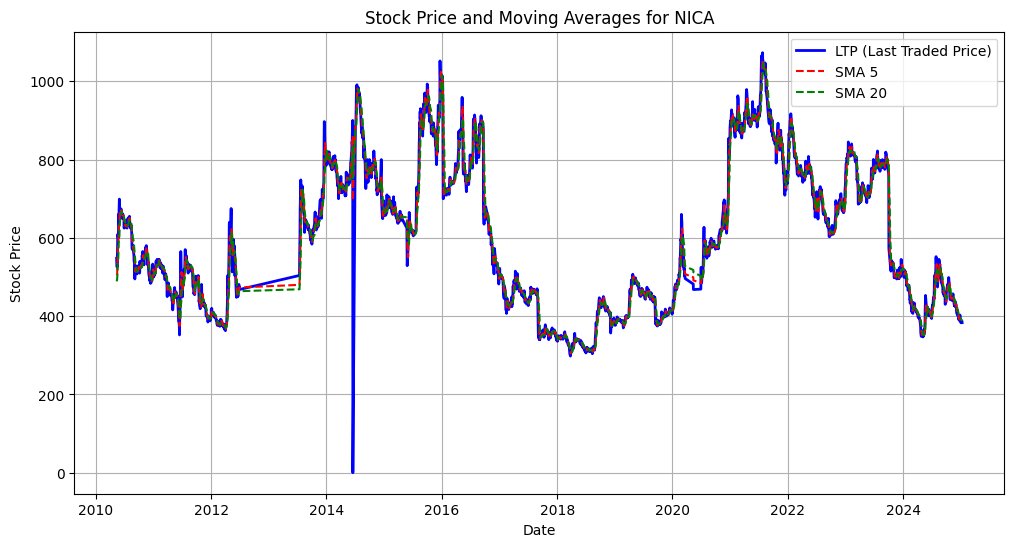

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/StockPredicitionDatasets.csv")

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Select a specific stock for visualization (e.g., first unique symbol)
stock_symbol = df['Symbol'].dropna().unique()[0]
df_stock = df[df['Symbol'] == stock_symbol]

# Sort data by Date
df_stock = df_stock.sort_values(by='Date')

# Plot LTP and Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Date'], df_stock['LTP'], label='LTP (Last Traded Price)', color='blue', linewidth=2)
plt.plot(df_stock['Date'], df_stock['SMA_5'], label='SMA 5', color='red', linestyle='dashed')
plt.plot(df_stock['Date'], df_stock['SMA_20'], label='SMA 20', color='green', linestyle='dashed')

# Formatting
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'Stock Price and Moving Averages for {stock_symbol}')
plt.legend()
plt.grid()
plt.show()


<ipython-input-5-5bd142030b82>:9: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/StockPredicitionDatasets.csv")


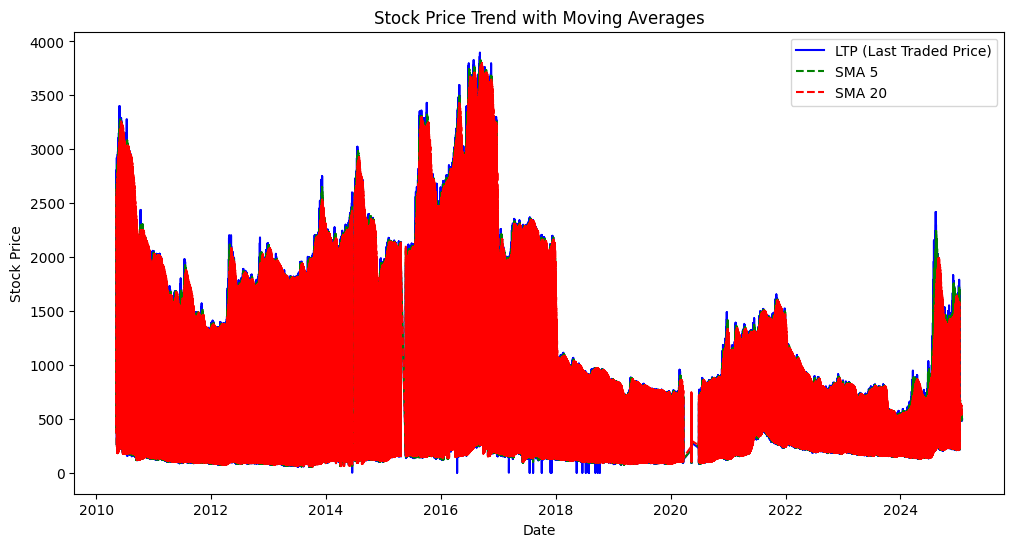

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/StockPredicitionDatasets.csv")

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values(by=["Date"])  # Ensure chronological order

### 1. Line Chart - Stock Price Trend
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["LTP"], label='LTP (Last Traded Price)', color='blue')
plt.plot(df["Date"], df["SMA_5"], label='SMA 5', linestyle='dashed', color='green')
plt.plot(df["Date"], df["SMA_20"], label='SMA 20', linestyle='dashed', color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Trend with Moving Averages")
plt.legend()
plt.show()



In [ ]:
### 2. Candlestick Chart
fig = go.Figure(data=[go.Candlestick(
    x=df["Date"],
    open=df["LTP"],
    high=df["High"],
    low=df["Low"],
    close=df["LTP"],
    name="Candlestick"
)])
fig.update_layout(title="Candlestick Chart", xaxis_title="Date", yaxis_title="Price")
fig.show()

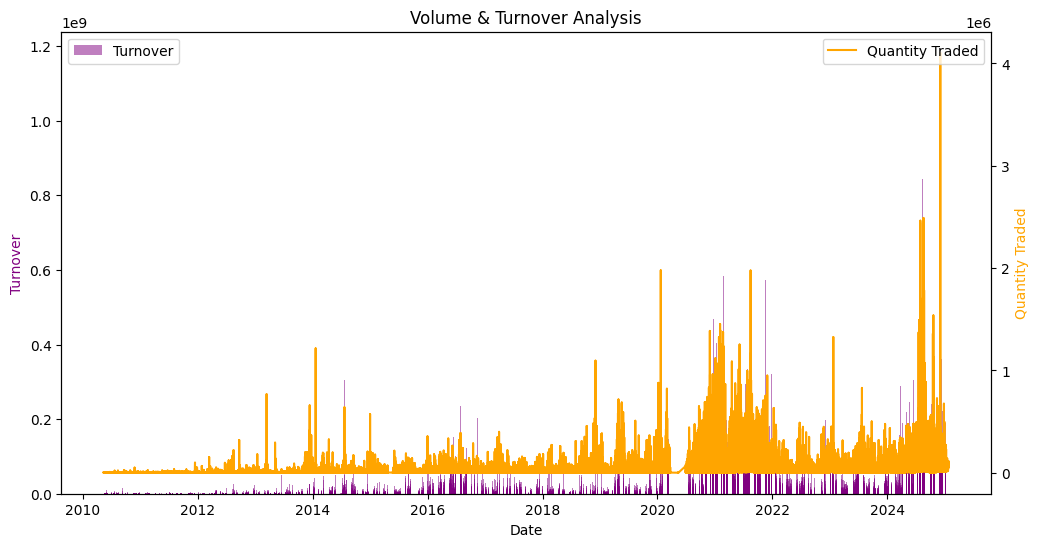

In [ ]:
### 3. Volume & Turnover Analysis
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(df["Date"], df["Turnover"], color='purple', alpha=0.5, label='Turnover')
ax1.set_xlabel("Date")
ax1.set_ylabel("Turnover", color='purple')
ax2 = ax1.twinx()
ax2.plot(df["Date"], df["Qty"], color='orange', label='Quantity Traded')
ax2.set_ylabel("Quantity Traded", color='orange')
plt.title("Volume & Turnover Analysis")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

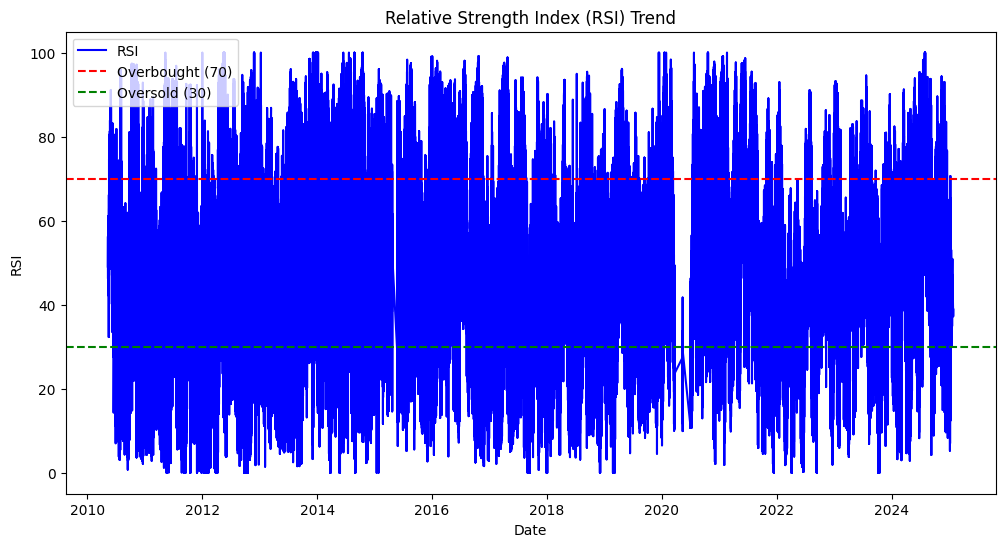

In [ ]:
### 4. RSI Trend
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["RSI"], label="RSI", color='blue')
plt.axhline(70, linestyle='dashed', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='dashed', color='green', label='Oversold (30)')
plt.xlabel("Date")
plt.ylabel("RSI")
plt.title("Relative Strength Index (RSI) Trend")
plt.legend()
plt.show()




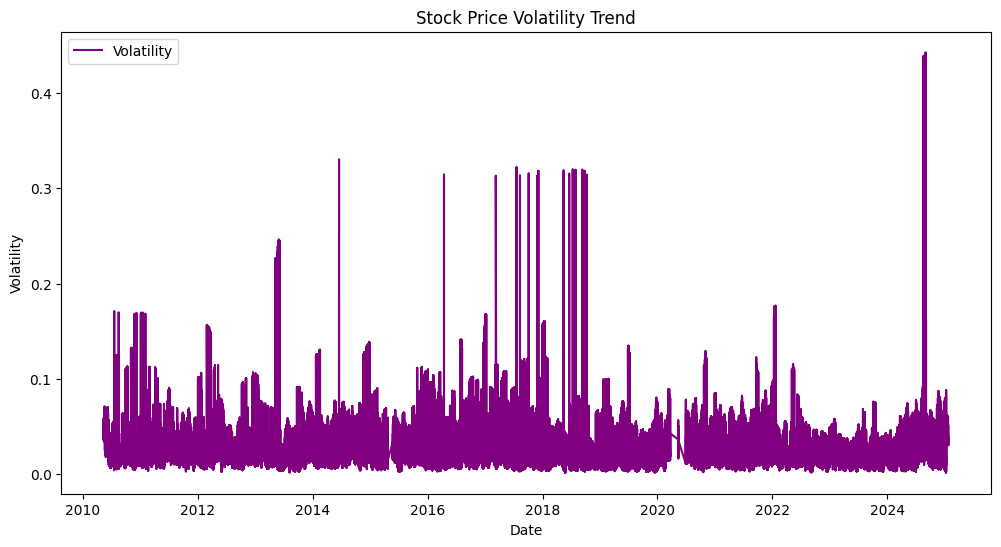

In [ ]:
### 5. Volatility Analysis
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Volatility"], label="Volatility", color='purple')
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Stock Price Volatility Trend")
plt.legend()
plt.show()



<ipython-input-10-4b98a0e9a8ad>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




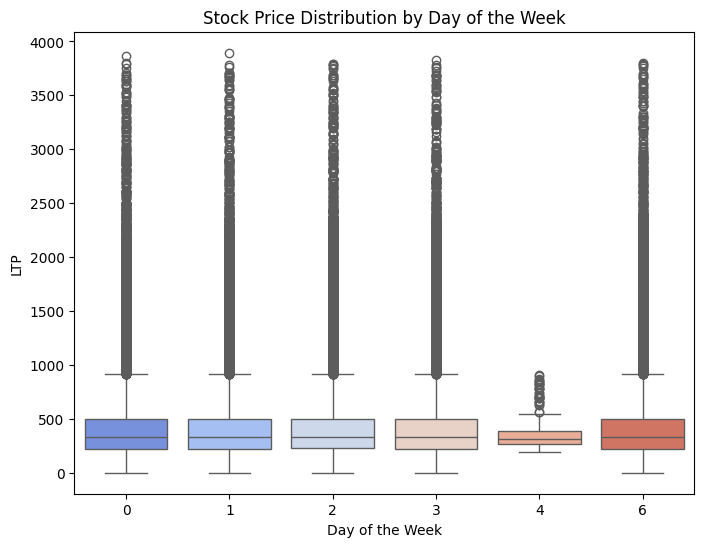

In [ ]:
### 6. Stock Performance by Day of the Week
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["day_of_week"], y=df["LTP"], palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("LTP")
plt.title("Stock Price Distribution by Day of the Week")
plt.show()



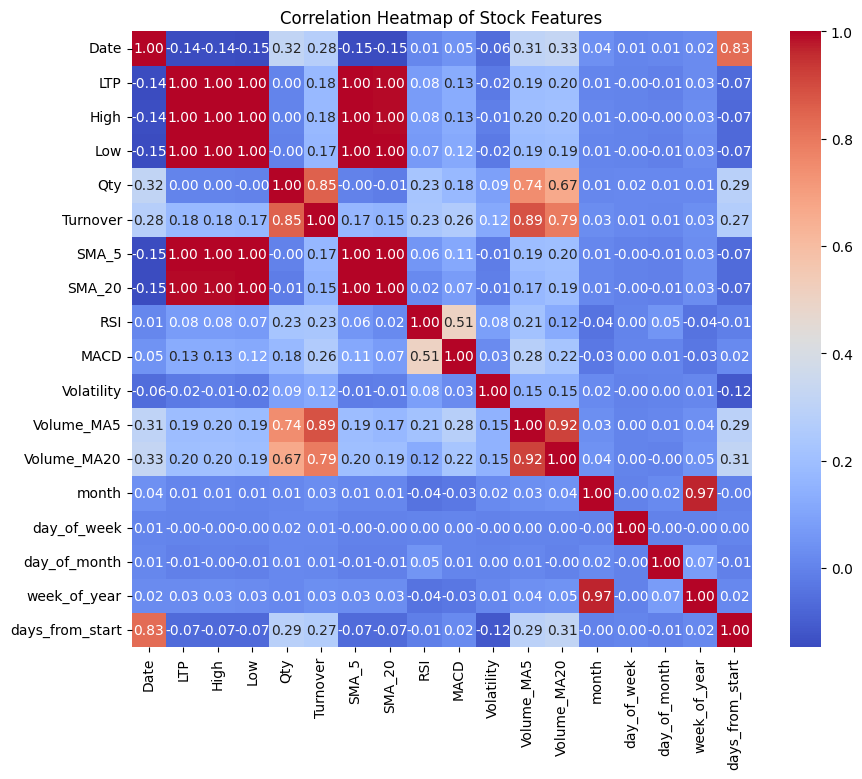

In [ ]:
### 7. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns=['Unnamed: 19', 'Symbol']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Stock Features")
plt.show()



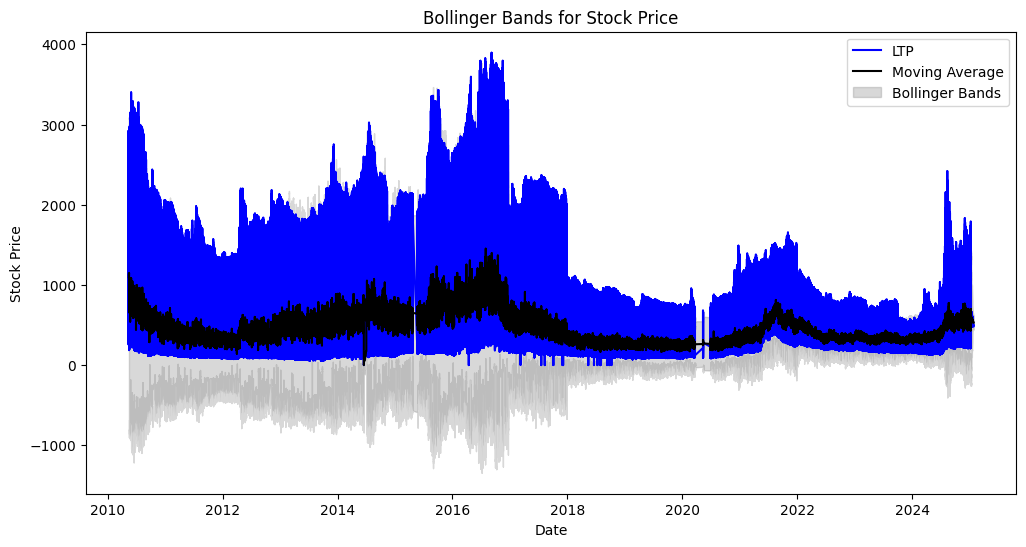

In [ ]:
### 8. Bollinger Bands
window = 20
rolling_mean = df['LTP'].rolling(window=window).mean()
rolling_std = df['LTP'].rolling(window=window).std()
upper_band = rolling_mean + (rolling_std * 2)
lower_band = rolling_mean - (rolling_std * 2)
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["LTP"], label='LTP', color='blue')
plt.plot(df["Date"], rolling_mean, label='Moving Average', color='black')
plt.fill_between(df["Date"], upper_band, lower_band, color='gray', alpha=0.3, label='Bollinger Bands')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Bollinger Bands for Stock Price")
plt.legend()
plt.show()



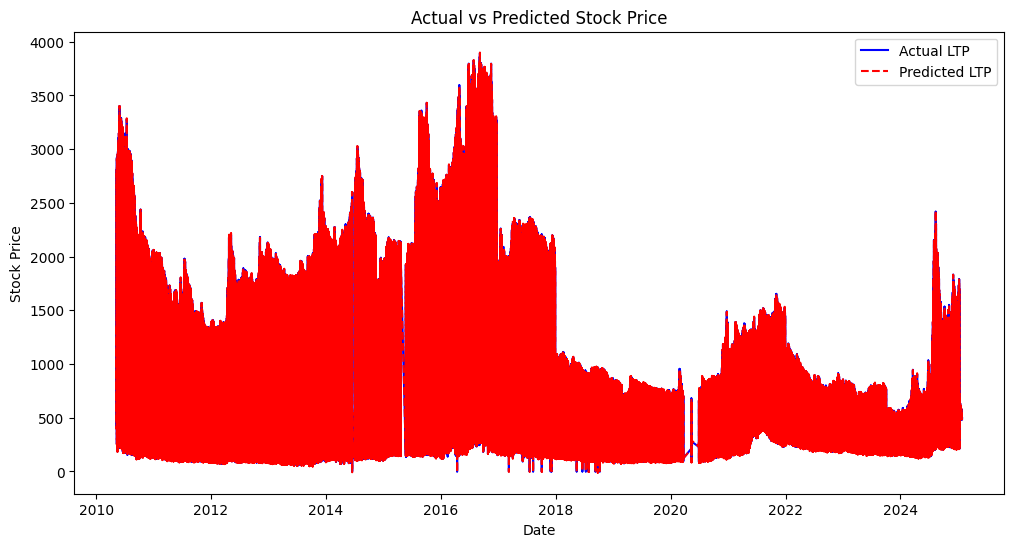

In [ ]:
### 9. Forecasting vs Actual (Once TFT model is trained)
# Assuming 'predicted_LTP' is added after model prediction
df['Predicted_LTP'] = np.random.normal(df['LTP'], scale=5)  # Dummy prediction for visualization
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["LTP"], label='Actual LTP', color='blue')
plt.plot(df["Date"], df["Predicted_LTP"], label='Predicted LTP', linestyle='dashed', color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Price")
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling
df[["SMA_5", "SMA_20"]] = scaler.fit_transform(df[["SMA_5", "SMA_20"]])


In [ ]:
df[["Volume_MA5", "Volume_MA20"]] = scaler.fit_transform(df[["Volume_MA5", "Volume_MA20"]])


In [ ]:
print(df["Symbol"].nunique())  # If it returns 1, you may not need encoding.


46


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define numerical columns to normalize
num_cols = ["LTP", "High", "Low", "Qty", "Turnover", "RSI", "MACD", "Volatility",
            "SMA_5", "SMA_20", "Volume_MA5", "Volume_MA20"]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization
df[num_cols] = scaler.fit_transform(df[num_cols])

# Print sample output to check
print(df.head())


            Date       LTP      High       Low       Qty  Turnover     SMA_5  \
3094  2010-05-12  0.347882  0.345395  0.336842  0.000235  0.001092  0.317711   
6412  2010-05-12  0.102696  0.101215  0.097632  0.000058  0.000078  0.083913   
9743  2010-05-12  0.107831  0.108300  0.103421  0.000493  0.000706  0.088796   
34132 2010-05-12  0.539153  0.508603  0.565789  0.000232  0.001685  0.500823   
40551 2010-05-12  0.721438  0.728998  0.721053  0.000661  0.006467  0.694868   

         SMA_20       RSI      MACD  ...  Volume_MA5  Volume_MA20  month  \
3094   0.309239  0.464424  0.517066  ...    0.001206     0.002598      4   
6412   0.083942  0.478571  0.556545  ...    0.000312     0.000674      4   
9743   0.082979  0.505952  0.558597  ...    0.001106     0.001520      4   
34132  0.477417  0.562344  0.552165  ...    0.001582     0.003422      4   
40551  0.678433  0.488474  0.516435  ...    0.004749     0.006656      4   

       day_of_week  day_of_month  week_of_year  days_from_star

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/StockPredicitionDatasets.csv", low_memory=False)  # Prevent DtypeWarning

# Drop unwanted columns
df = df.drop(columns=["Unnamed: 19"], errors="ignore")

# Convert date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])  # Remove rows with invalid dates
df["days_from_start"] = (df["Date"] - df["Date"].min()).dt.days  # Convert date to numerical index

# Ensure numerical features are properly handled
num_cols = ["LTP", "High", "Low", "Qty", "Turnover", "RSI", "MACD", "Volatility"]
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())  # Fill missing values
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])  # Normalize

# Encode categorical variables
df["Symbol"] = df["Symbol"].fillna("Unknown")  # Handle missing values in Symbol
encoder = LabelEncoder()
df["Symbol"] = encoder.fit_transform(df["Symbol"])  # Encode stock symbols

# Sort dataset by Date and Symbol
df = df.sort_values(by=["Symbol", "Date"])

# Print dataset structure
print(df.head())


            Date       LTP      High       Low       Qty  Turnover  SMA_5  \
30877 2010-09-15  0.030039  0.030870  0.030263  0.001678  0.000677  117.8   
30878 2010-09-16  0.030809  0.030870  0.030526  0.001286  0.000528  117.4   
30879 2010-09-19  0.030295  0.030364  0.030526  0.000645  0.000267  117.4   
30880 2010-09-20  0.030295  0.030111  0.030526  0.000571  0.000233  117.8   
30881 2010-09-21  0.029782  0.029858  0.030263  0.001744  0.000704  117.8   

       SMA_20       RSI      MACD  Volatility  Volume_MA5  Volume_MA20  month  \
30877   135.2  0.007407  0.523045    0.091835    891757.2     534362.3      8   
30878   129.4  0.028986  0.523612    0.098930    637232.8     595550.3      8   
30879   124.3  0.030534  0.524355    0.099380    585115.2     626551.4      8   
30880   120.8  0.037383  0.525428    0.089590    469013.6     652480.0      8   
30881   118.6  0.045455  0.526548    0.069115    568464.2     683325.8      8   

       day_of_week  day_of_month  week_of_year  da

In [ ]:
# Create lag features for LTP (Last Traded Price)
df['LTP_Lag1'] = df['LTP'].shift(1)
df['LTP_Lag2'] = df['LTP'].shift(2)


# Drop rows with NaN values created by lagging
df = df.dropna()


In [ ]:
from sklearn.model_selection import train_test_split

# Define target and features
X = df.drop(columns=["Date", "LTP", "Symbol"])  # Features (without target and unnecessary columns)
y = df["LTP"]  # Target variable (LTP for stock price prediction)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
df.head()

Date       LTP      High       Low       Qty  Turnover  SMA_5  \
30879 2010-09-19  0.030295  0.030364  0.030526  0.000645  0.000267  117.4   
30880 2010-09-20  0.030295  0.030111  0.030526  0.000571  0.000233  117.8   
30881 2010-09-21  0.029782  0.029858  0.030263  0.001744  0.000704  117.8   
30882 2010-09-23  0.030809  0.030364  0.030789  0.002050  0.000839  118.4   
30883 2010-09-26  0.031065  0.030870  0.030789  0.002324  0.000973  118.6   

       SMA_20       RSI      MACD  ...  Volume_MA5  Volume_MA20  month  \
30879   124.3  0.030534  0.524355  ...    585115.2     626551.4      8   
30880   120.8  0.037383  0.525428  ...    469013.6     652480.0      8   
30881   118.6  0.045455  0.526548  ...    568464.2     683325.8      8   
30882   118.1  0.108108  0.528289  ...    606637.0     749197.1      8   
30883   118.0  0.136364  0.530197  ...    711608.6     674420.7      8   

       day_of_week  day_of_month  week_of_year  days_from_start  Symbol  \
30879            6            18            36              130       0   
30880            0            19            37              131       0   
30881            1            20            37              132       0   
30882            3            22            37              134       0   
30883            6            25            37              137       0   

       LTP_Lag1  LTP_Lag2  
30879  0.030809  0.030039  
30880  0.030295  0.030809  
30881  0.030295  0.030295  
30882  0.029782  0.030295  
30883  0.030809  0.029782  

[5 rows x 21 columns]

In [ ]:
df.head()

Date       LTP      High       Low       Qty  Turnover  SMA_5  \
30879 2010-09-19  0.030295  0.030364  0.030526  0.000645  0.000267  117.4   
30880 2010-09-20  0.030295  0.030111  0.030526  0.000571  0.000233  117.8   
30881 2010-09-21  0.029782  0.029858  0.030263  0.001744  0.000704  117.8   
30882 2010-09-23  0.030809  0.030364  0.030789  0.002050  0.000839  118.4   
30883 2010-09-26  0.031065  0.030870  0.030789  0.002324  0.000973  118.6   

       SMA_20       RSI      MACD  ...  Volume_MA5  Volume_MA20  month  \
30879   124.3  0.030534  0.524355  ...    585115.2     626551.4      8   
30880   120.8  0.037383  0.525428  ...    469013.6     652480.0      8   
30881   118.6  0.045455  0.526548  ...    568464.2     683325.8      8   
30882   118.1  0.108108  0.528289  ...    606637.0     749197.1      8   
30883   118.0  0.136364  0.530197  ...    711608.6     674420.7      8   

       day_of_week  day_of_month  week_of_year  days_from_start  Symbol  \
30879            6            18            36              130       0   
30880            0            19            37              131       0   
30881            1            20            37              132       0   
30882            3            22            37              134       0   
30883            6            25            37              137       0   

       LTP_Lag1  LTP_Lag2  
30879  0.030809  0.030039  
30880  0.030295  0.030809  
30881  0.030295  0.030295  
30882  0.029782  0.030295  
30883  0.030809  0.029782  

[5 rows x 21 columns]

In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout, MultiHeadAttention, Add, LayerNormalization
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import AdamW

# Enable GPU acceleration
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

# Load Data
df = pd.read_csv("/content/drive/MyDrive/StockPredicitionDatasets.csv", low_memory=False)

# Feature Engineering (Adding More Predictive Features)
df['LTP_Lag1'] = df['LTP'].shift(1).bfill()
df['LTP_Lag2'] = df['LTP'].shift(2).bfill()
df['LTP_Lag3'] = df['LTP'].shift(3).bfill()
df['LTP_Lag4'] = df['LTP'].shift(4).bfill()
df['Momentum'] = df['LTP'] - df['LTP_Lag1']  # Price Change Feature
df['SMA_5'] = df['LTP'].rolling(5).mean().bfill()
df['Volatility'] = df['LTP'].rolling(5).std().bfill()

# Feature selection
features = ['month', 'day_of_week', 'day_of_month', 'week_of_year', 'days_from_start',
            'Symbol', 'LTP_Lag1', 'LTP_Lag2', 'LTP_Lag3', 'LTP_Lag4', 'Momentum', 'SMA_5', 'Volatility']

# Remove missing columns
features = [col for col in features if col in df.columns]

# Convert categorical column ('Symbol') into numeric encoding
if 'Symbol' in df.columns:
    df['Symbol'] = LabelEncoder().fit_transform(df['Symbol'])

# Remove NaN values
df.dropna(inplace=True)

# Prepare Data
X = df[features].values
y = df['LTP'].values

# Train/Test Split
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Normalize Data
scaler_X = MinMaxScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Reshape for LSTM (Longer Sequence: 5 Time Steps)
SEQ_LENGTH = 5
train_size_adj = (X_train.shape[0] // SEQ_LENGTH) * SEQ_LENGTH
test_size_adj = (X_test.shape[0] // SEQ_LENGTH) * SEQ_LENGTH

X_train = X_train[:train_size_adj]
X_test = X_test[:test_size_adj]
y_train = y_train[:train_size_adj]
y_test = y_test[:test_size_adj]

X_train = X_train.reshape((train_size_adj // SEQ_LENGTH, SEQ_LENGTH, X_train.shape[1]))
X_test = X_test.reshape((test_size_adj // SEQ_LENGTH, SEQ_LENGTH, X_test.shape[1]))

y_train = y_train.reshape((train_size_adj // SEQ_LENGTH, SEQ_LENGTH, 1))
y_test = y_test.reshape((test_size_adj // SEQ_LENGTH, SEQ_LENGTH, 1))

# Optimized Model Architecture
def build_tft_model(seq_length, num_features, hidden_size=256, num_heads=4):
    input_layer = Input(shape=(seq_length, num_features))

    x = LSTM(hidden_size, return_sequences=True, dropout=0.2)(input_layer)
    x = LSTM(hidden_size // 2, return_sequences=True, dropout=0.2)(x)

    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=hidden_size)(x, x)
    attn_output = Add()([x, attn_output])
    attn_output = LayerNormalization()(attn_output)

    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(attn_output[:, -1, :])
    x = Dropout(0.2)(x)
    output_layer = Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

    return models.Model(inputs=input_layer, outputs=output_layer)

# Train Model
BATCH_SIZE = 32
LEARNING_RATE = 0.0001

tft_model = build_tft_model(SEQ_LENGTH, X_train.shape[2])
tft_model.compile(optimizer=AdamW(LEARNING_RATE), loss="mse")

# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Train Model
history = tft_model.fit(X_train, y_train,
              epochs=100,
              batch_size=BATCH_SIZE,
              validation_data=(X_test, y_test),
              callbacks=[early_stopping, lr_scheduler],
              verbose=1)

# Evaluate Model
y_pred = tft_model.predict(X_test).flatten()

# Inverse Transform Predictions
y_pred_actual = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate Metrics
mae = mean_absolute_error(y_test_actual, y_pred_actual)
mse = mean_squared_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

# Output Metrics
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Save Model
tft_model.save("tft_stock_model_optimized.h5")
with open("scaler_optimized.pkl", "wb") as f:
    pickle.dump({'scaler_X': scaler_X, 'scaler_y': scaler_y}, f)

# Download Files (for Colab)
from google.colab import files
files.download("tft_stock_model_optimized.h5")
files.download("scaler_optimized.pkl")
tft_model.save("tft_stock_model_optimized.keras")


In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout, MultiHeadAttention, Add, LayerNormalization
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import AdamW

# Enable GPU acceleration
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

# Load Data
df = pd.read_csv("/content/drive/MyDrive/StockPredicitionDatasets.csv", low_memory=False)

# Ensure 'LTP_Lag1' and 'LTP_Lag2' exist
df['LTP_Lag1'] = df['LTP'].shift(1).bfill()
df['LTP_Lag2'] = df['LTP'].shift(2).bfill()
df['LTP_Lag3'] = df['LTP'].shift(3).bfill()
df['LTP_Lag4'] = df['LTP'].shift(4).bfill()
df['Price_Change'] = df['LTP'] - df['LTP_Lag1']  # Momentum feature

# Feature selection (Updated with Lag & Momentum)
features = ['month', 'day_of_week', 'day_of_month', 'week_of_year', 'days_from_start',
            'Symbol', 'LTP_Lag1', 'LTP_Lag2', 'LTP_Lag3', 'LTP_Lag4', 'Price_Change']

# Remove missing columns
features = [col for col in features if col in df.columns]

# Convert categorical column ('Symbol') into numeric encoding
if 'Symbol' in df.columns:
    df['Symbol'] = LabelEncoder().fit_transform(df['Symbol'])

# Remove NaN values
df.dropna(inplace=True)

# Prepare Data
X = df[features].values
y = df['LTP'].values

# Train/Test Split
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Normalize Data
scaler_X = MinMaxScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Optimized Model Architecture
def build_tft_model(seq_length, num_features, hidden_size=256, num_heads=4):
    input_layer = Input(shape=(seq_length, num_features))

    x = LSTM(hidden_size, return_sequences=True, dropout=0.2)(input_layer)  # Increased LSTM size & dropout
    x = LSTM(hidden_size // 2, return_sequences=True, dropout=0.2)(x)

    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=hidden_size)(x, x)
    attn_output = Add()([x, attn_output])
    attn_output = LayerNormalization()(attn_output)

    x = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(attn_output[:, -1, :])
    x = Dropout(0.2)(x)  # Increased dropout
    output_layer = Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)  # Added L2 regularization

    return models.Model(inputs=input_layer, outputs=output_layer)

# Train Model
BATCH_SIZE = 32  # Smaller batch size for better generalization
LEARNING_RATE = 0.0001  # Reduced learning rate for smoother convergence

tft_model = build_tft_model(1, X_train.shape[2])
tft_model.compile(optimizer=AdamW(LEARNING_RATE), loss="mse")  # Switched to AdamW optimizer

# Callbacks for better training
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Train Model
history = tft_model.fit(X_train, y_train,
              epochs=100,  # Increased epochs
              batch_size=BATCH_SIZE,
              validation_data=(X_test, y_test),
              callbacks=[early_stopping, lr_scheduler],
              verbose=1)

# Evaluate Model
y_pred = tft_model.predict(X_test).flatten()

# Inverse Transform Predictions
y_pred_actual = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate Metrics
mae = mean_absolute_error(y_test_actual, y_pred_actual)
mse = mean_squared_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

# Output Metrics
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Save Model
tft_model.save("tft_stock_model_optimized.h5")
with open("scaler_optimized.pkl", "wb") as f:
    pickle.dump({'scaler_X': scaler_X, 'scaler_y': scaler_y}, f)

# Download Files (for Colab)
from google.colab import files
files.download("tft_stock_model_optimized.h5")
files.download("scaler_optimized.pkl")
tft_model.save("tft_stock_model_optimized.keras")


In [ ]:
# Save Model in both HDF5 and Keras formats
tft_model.save("tft_stock_model_optimized.h5")  # HDF5 format
tft_model.save("tft_stock_model_optimized.keras")  # Keras format (no need for save_format argument)

# Save the scalers
with open("scaler_optimized.pkl", "wb") as f:
    pickle.dump({'scaler_X': scaler_X, 'scaler_y': scaler_y}, f)

# Verify Files Exist Before Downloading
import os
for filename in ["tft_stock_model_optimized.h5", "tft_stock_model_optimized.keras", "scaler_optimized.pkl"]:
    if os.path.exists(filename):
        files.download(filename)
    else:
        print(f"Warning: {filename} not found, skipping download.")


In [ ]:
# Load the model
tft_model = tf.keras.models.load_model('/content/tft_stock_model_optimized.keras')


In [ ]:
X_test.shape

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import pickle

# Load the trained TFT model without optimizer to avoid warnings
tft_model = tf.keras.models.load_model('/content/tft_stock_model_optimized.keras', compile=False)

# Load the scalers from the pickle file
with open('/content/scaler_optimized.pkl', 'rb') as f:
    scalers = pickle.load(f)

scaler_X = scalers['scaler_X']
scaler_y = scalers['scaler_y']

# Function to prepare and scale the input data
def prepare_input(data):
    # Create a dataframe with the correct columns
    df = pd.DataFrame(data, columns=['month', 'day_of_week', 'day_of_month', 'week_of_year',
                                     'days_from_start', 'Symbol', 'LTP_Lag1', 'LTP_Lag2'])

    # Ensure input feature count matches the scaler's expected features
    assert df.shape[1] == scaler_X.n_features_in_, f"Feature mismatch: Expected {scaler_X.n_features_in_}, but got {df.shape[1]}"

    # Convert DataFrame to NumPy array before transforming (to avoid feature names warning)
    scaled_features = scaler_X.transform(df.values)

    # Reshape input for the LSTM model (samples, timesteps, features)
    scaled_features_reshaped = scaled_features.reshape((scaled_features.shape[0], 1, scaled_features.shape[1]))

    return scaled_features_reshaped

# Example input data
input_data = {
    'month': [2],  # Example month (February)
    'day_of_week': [3],  # Example day of the week (Wednesday)
    'day_of_month': [18],  # Example day of the month
    'week_of_year': [8],  # Example week of the year
    'days_from_start': [30],  # Example days from the start of the dataset
    'Symbol': [5],  # Example encoded Symbol (replace with actual encoding)
    'LTP_Lag1': [1500],  # Example LTP_Lag1
    'LTP_Lag2': [1495]  # Example LTP_Lag2
}

# Prepare the input data
input_data_reshaped = prepare_input(input_data)

# Make prediction using the trained model
predicted_price = tft_model.predict(input_data_reshaped)

# Inverse transform the predicted value
predicted_price_actual = scaler_y.inverse_transform(predicted_price.reshape(-1, 1))

# Output the prediction
print(f"Predicted Stock Price: {predicted_price_actual[0][0]:.2f}")
